# OIL AND GAS IN THE EAGLEFORD![EagleFordWells_edited.jpg](attachment:EagleFordWells_edited.jpg)![rig_sort%20-%20Copy.png](attachment:rig_sort%20-%20Copy.png)


## We're a burgeoning exploration company seeking funding for an Eagleford asset.  Investing in a quality area is our primary concern.  A quality area has high production values and should primarily be oil. Costs are important, and are prohibitive at exorbatant levels.  We will use Sub-Plays to define our areas (think, zip codes for the O&G). Furthermore, sub-plays of high well and operator activity are not only indicative of geologically sound areas, but also have more data on drilling and completion costs and methods. Once we narrow down to two sub-plays we will look at minimum and maximimum potential costs for drilling and completing.  

## We're Looking For:
### - High Total Production (EUR (boe))
### - Oil as Primary Commodity
### - Average Drilling Costs 
### - Average Completions Costs
### - More Wells and Operators than Average Eagle Ford Sub-Plays
### - Once sub-plays are established, analyze competitor data to get potential minimum and maximum drilling and completion costs.

# LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import matplotlib
from mpl_toolkits.basemap import Basemap
import requests
import openpyxl as xl

% matplotlib inline

# DATA CLEANING

In [2]:
#Import and read xlsx file into a dataframe 
file = "Eagle Ford Data.xlsx"
df = pd.read_excel(file, sheet_name=0)

In [3]:
#Get a list of columns to see which ones are irrelevant 
df.columns

Index(['API', 'Longitude', 'Latitude', 'Bottomhole longitude',
       'Bottomhole latitude', 'Well Number', 'Lease Name', 'Well Type',
       'Permit Type', 'Pad', 'Operator', 'Operator (Subsidiary)',
       'Operator (Original)', 'Operator Thematic Group', 'Operator US Focus',
       'Play', 'Sub-play', 'State', 'County', 'Region', 'Basin', 'Reservoir',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date', 'First Production Date', 'IP Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)',
       'Fracture Stages (stages)', 'Water (l)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum30

In [4]:
#Drop irrelevant columns
df_subset = df.drop(columns = ['Bottomhole longitude','Bottomhole latitude', 'Well Number', 'Lease Name',
       'Permit Type', 'Pad','Operator (Subsidiary)', 'Operator Thematic Group', 'Operator US Focus', 'Play', 'State', 'Region', 'Basin',
       'Field', 'Permit Date', 'Drilling Start Date', 'Drilling End Date',
       'Completion Date','Fracture Stages (stages)','Cum30 Oil (bbl)',
       'Cum60 Oil (bbl)', 'Cum90 Oil (bbl)', 'Cum30 Gas (mcf)', 'Cum60 Gas (mcf)',
       'Cum90 Gas (mcf)','Cum30 Total (boe)', 'Cum60 Total (boe)', 'Cum90 Total (boe)',
       'Cum180 Total (boe)','bi Oil', 'Di Oil (per month)',
       'Dmin Oil (per year)', 'bi Gas', 'Di Gas (per month)',
       'Dmin Gas (per year)', 'Reservoir', 'Water (l)', 'IP Date'])

In [5]:
#Check if there are duplicate values in API column
df_subset.API.duplicated().sum
#Check data types 
types = df_subset.dtypes
types

API                                int64
Longitude                        float64
Latitude                         float64
Well Type                         object
Operator                          object
Operator (Original)               object
Sub-play                          object
County                            object
First Production Date     datetime64[ns]
Vertical Depth (m)               float64
Measured Depth (m)               float64
Lateral Length (m)               float64
Drilling Days (days)             float64
Drilling Speed (m/day)           float64
Proppant (kg)                    float64
API Gravity (degree)             float64
Well Cost Total (US$)            float64
Rig Cost (US$)                   float64
Casing Cost (US$)                float64
Water Cost (US$)                 float64
Proppant Cost (US$)              float64
Pumping Cost (US$)               float64
Other Cost (US$)                 float64
Cum180 Oil (bbl)                 float64
Cum365 Oil (bbl)

In [6]:
#check shape
df_subset.shape

(17882, 34)

In [7]:
#Dropping rows that contain less than half of observations
df_subset = df_subset.dropna(thresh=16)

#Return a list of columns with missing values
columns = df_subset.columns[df_subset.isnull().any()]

#Fill missing values with average values for that column
for column in columns:
    df_subset[column].fillna(df_subset.groupby("Sub-play")[column].transform("mean"), inplace=True)

In [8]:
#Confirm there are no missing values 
df_subset.isnull().any()

#There are, so fill in with means for that column
cols = ["Well Cost Total (US$)", "Rig Cost (US$)", "Casing Cost (US$)",  
       "Water Cost (US$)", "Proppant Cost (US$)", "Pumping Cost (US$)", "Other Cost (US$)"]
for col in cols:
    df_subset[col].fillna(df_subset[col].mean(), inplace=True)  

In [10]:
#Check again
df_subset.isnull().any()

API                       False
Longitude                 False
Latitude                  False
Well Type                 False
Operator                  False
Operator (Original)       False
Sub-play                  False
County                    False
First Production Date     False
Vertical Depth (m)        False
Measured Depth (m)        False
Lateral Length (m)        False
Drilling Days (days)      False
Drilling Speed (m/day)    False
Proppant (kg)             False
API Gravity (degree)      False
Well Cost Total (US$)     False
Rig Cost (US$)            False
Casing Cost (US$)         False
Water Cost (US$)          False
Proppant Cost (US$)       False
Pumping Cost (US$)        False
Other Cost (US$)          False
Cum180 Oil (bbl)          False
Cum365 Oil (bbl)          False
Cum180 Gas (mcf)          False
Cum365 Gas (mcf)          False
Cum365 Total (boe)        False
IP Oil (b/d)              False
IP Gas (mmcfd)            False
IP Total (boe/d)          False
EUR Oil 

In [25]:
#Saving clean data to a csv
df_subset.to_csv("clean_data.csv", sep=',', index = False)

# SHOW THE GEOGRAPHIC EXTENT OF THE DATA

# AREA MAP

In [11]:
#import cleaned csv
eagleford_df = pd.read_csv("clean_data.csv")

In [12]:
#differentiate between commodity
#oil dataframe
oil = eagleford_df[(eagleford_df['Well Type'] != 'Gas')]
#gas dataframe
gas = eagleford_df[(eagleford_df['Well Type'] == 'Gas')]

In [13]:
#Grab lat/longs for mapping
#lat/Longs for extent
lats = list(eagleford_df['Latitude'])
lons = list(eagleford_df['Longitude'])
boeSz = list(eagleford_df['EUR Total (mmboe)'])
#Lat/longs for oil
olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
#Lat/longs for gas
glats = list(gas['Latitude'])
glons = list(gas['Longitude'])

NameError: name 'Basemap' is not defined

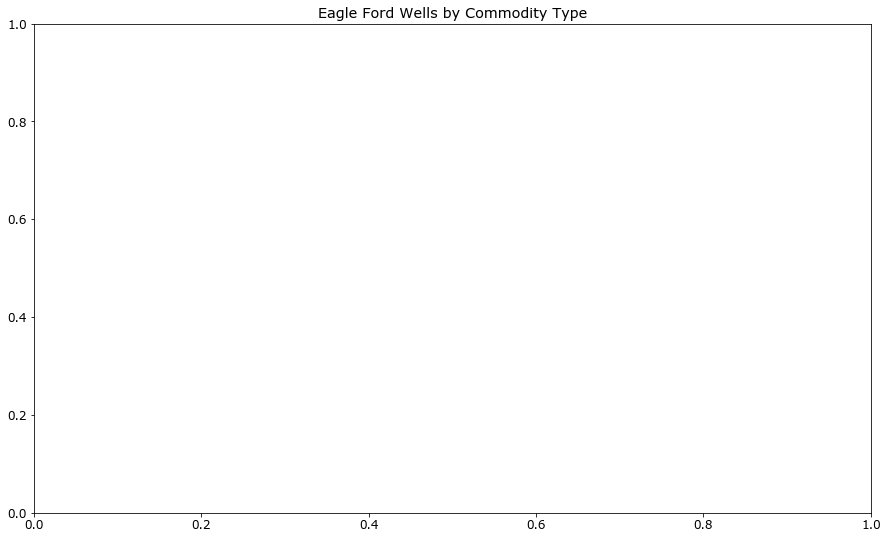

In [14]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 0.1

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells by Commodity Type")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.etopo()
#m.shadedrelief()

min_marker_size = 3

for i in range(len(glons)):
#for i in range(3000):
    x,y = m(float(glons[i]), float(glats[i]))
    msize = boeSz[i]*min_marker_size
    m.plot(x, y, marker = 'o', c='red', markersize=msize, alpha=0.5, latlon=False)

for i in range(len(olons)):
#for i in range(3000):
    x,y = m(float(olons[i]), float(olats[i]))
    msize = boeSz[i]*min_marker_size
    m.plot(x, y, marker = 'o', c='green', markersize=msize, alpha=0.5, latlon=False)
 

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', dpi=96, transparent=True)
plt.show()

###### (Austin to work on our own sub-play map)

![areas.png](attachment:areas.png)

# WHY THE EAGLE FORD?

In [15]:
#PROD BY YEAR
# Convert First Production Date column to datetime
eagleford_df['First Production Date'] = pd.to_datetime(eagleford_df['First Production Date'])

# Get date after a year from First Production Date
cum365_date = eagleford_df['First Production Date']+np.timedelta64(1, 'Y')

# Create and populate Cum365 Year column
eagleford_df['Cum365 Year'] = pd.DatetimeIndex(cum365_date).year

In [16]:
# Build cumulative production data frame
cum_prod_df = pd.DataFrame({
                           'Sub-play':eagleford_df['Sub-play'],
                           'Cum365 Oil (bbl)':eagleford_df['Cum365 Oil (bbl)'],
                           'Cum365 Gas (mcf)':eagleford_df['Cum365 Gas (mcf)'],
                           'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                           'Cum365 Year':eagleford_df['Cum365 Year'],
                           })

In [17]:
# Drop rows with missing production data
cum_prod_df = cum_prod_df.dropna(axis=0,how='any')

# Drop rows where Cum365 Year equals 2018
cum_prod_df.drop(cum_prod_df[cum_prod_df['Cum365 Year']==2018].index,inplace=True)
cum_prod_df.head()

,Sub-play,Cum365 Oil (bbl),Cum365 Gas (mcf),Cum365 Total (boe),Cum365 Year
0,Black Oil,17850.0,10510.0,19700.0,2011
1,Black Oil,10853.0,16553.0,13766.0,2011
2,Black Oil,42766.0,19941.0,46276.0,2012
3,Black Oil,10853.0,16553.0,13766.0,2011
4,Black Oil,25943.0,25416.0,30416.0,2011


In [18]:
# Convert Cum365 Gas (mcf) to boe
cum_prod_df['Cum365 Gas (boe)'] = cum_prod_df['Cum365 Gas (mcf)']/6

# Calculate total production values by year and sub-play
cum_prod_values = cum_prod_df.groupby(['Cum365 Year']).sum()

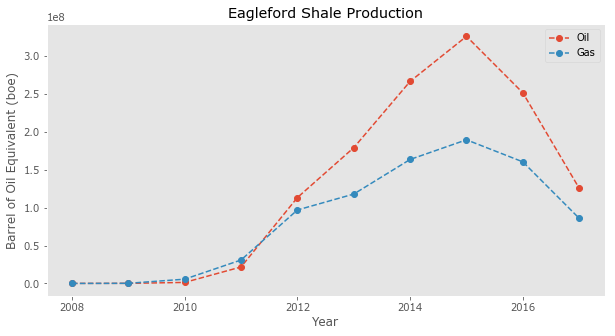

In [21]:

# Plot production values
with plt.style.context('ggplot'):
    cum_prod_values.loc[:,['Cum365 Oil (bbl)','Cum365 Gas (boe)']].plot(figsize=(10, 5),style='o--')

    # Add axis labels, title, and legend
    plt.title("Eagleford Shale Production")
    plt.ylabel("Barrel of Oil Equivalent (boe)")
    plt.xlabel("Year")
    plt.legend(['Oil', 'Gas'],loc='best')
plt.grid(False)
    # Show plot
plt.show()

plt.show()

# PRODUCTION

# By Sub-Play

In [22]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)

In [23]:
#import cleaned csv
eagleford_df = pd.read_csv(file)
eagleford_df

,API,Longitude,Latitude,Well Type,Operator,Operator (Original),Sub-play,County,First Production Date,Vertical Depth (m),...,Cum365 Oil (bbl),Cum180 Gas (mcf),Cum365 Gas (mcf),Cum365 Total (boe),IP Oil (b/d),IP Gas (mmcfd),IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe)
0,42013342710000,-98.332847,28.954002,Oil,EOG Resources,Chaparral Natural Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
1,42013342730000,-98.455662,28.728584,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
2,42013342780000,-98.470619,28.698830,Oil,Dewbre Petroleum Corporation,Dewbre Petroleum Corporation,Black Oil,Atascosa,2011-01-03,2975.000000,...,42766.000000,17618.000000,19941.000000,46276.000000,276.450000,0.16,287.40,0.172000,0.120000,0.193000
3,42013342790000,-98.450319,28.726421,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2944.000000,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
4,42013342850000,-98.439686,28.734653,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
5,42013342890000,-98.503519,28.712835,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2882.000000,...,22870.000000,12093.000000,19686.000000,26335.000000,128.460000,0.14,145.84,0.092000,0.118000,0.113000
6,42013342900000,-98.443229,28.730629,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
7,42013342910000,-98.167133,28.789627,Oil,ExxonMobil,XTO Energy,Karnes Trough,Atascosa,2010-01-10,3338.000000,...,4834.000000,2107.000000,2107.000000,5205.000000,793.730000,0.36,843.11,0.482000,0.523000,0.571000
8,42013343040000,-98.342421,28.952621,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
9,42013343060000,-98.154156,28.776823,Oil,Marathon Oil,Hilcorp Energy,Karnes Trough,Atascosa,2010-01-12,3234.000000,...,38713.000000,16303.000000,20219.000000,42272.000000,196.740000,0.16,225.67,0.173000,0.178000,0.205000


In [24]:
# Build production data frame
prod_df = pd.DataFrame({
                       'Sub-play':eagleford_df['Sub-play'],
                       'County':eagleford_df['County'],
                       'Well Cost Total (US$)':eagleford_df['Well Cost Total (US$)'],
                       'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                       'EUR Total (mmboe)':eagleford_df['EUR Total (mmboe)'],
                       'Cum365 Gas (mcf)':eagleford_df['Cum365 Gas (mcf)'],
                       'Cum365 Oil (bbl)':eagleford_df['Cum365 Oil (bbl)'],
                       'MD_Ft' :eagleford_df['Measured Depth (m)']/ 3.28084,
                       'LL_Ft' :eagleford_df['Lateral Length (m)']/ 3.28084
                       })

In [25]:
# Calculate average costs
prod_avg = prod_df.groupby('Sub-play').mean()

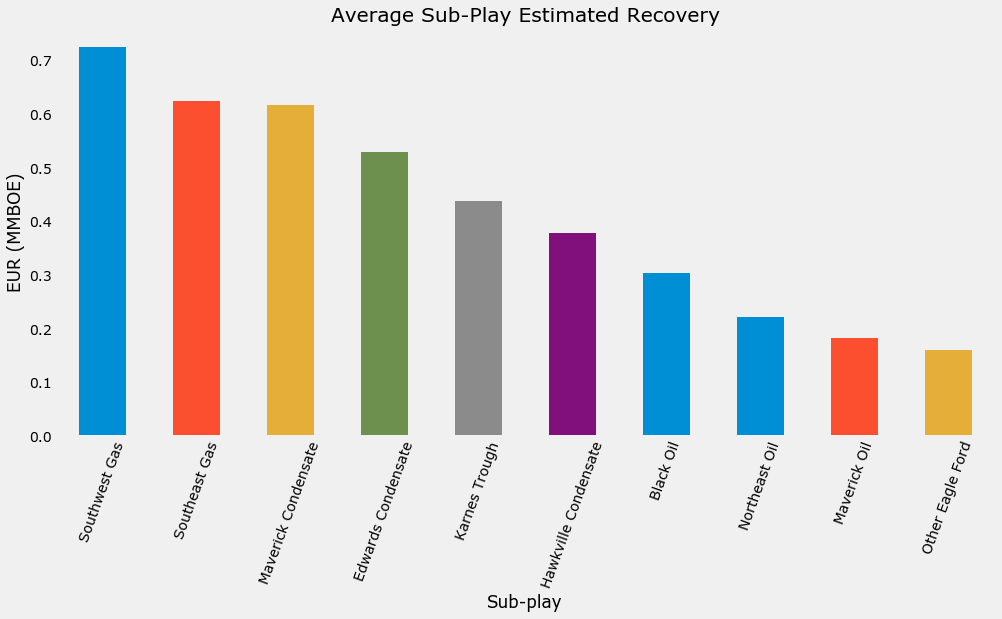

In [27]:
# Plot total cost averages
with plt.style.context('fivethirtyeight'):
    prod_avg.sort_values('EUR Total (mmboe)', ascending = False, inplace = True)
    prod_avg['EUR Total (mmboe)'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Average Sub-Play Estimated Recovery")
    plt.ylabel("EUR (MMBOE)")
    plt.grid(False)
    # Show plot
    plt.show()

### Estimated Ultimate Recovery gauges which areas will produce the most, have the highest value. Sw Gas, Se Gas, Maverick Condensate, Edwars Condensate, and Karnes Trough have the highest EURs.

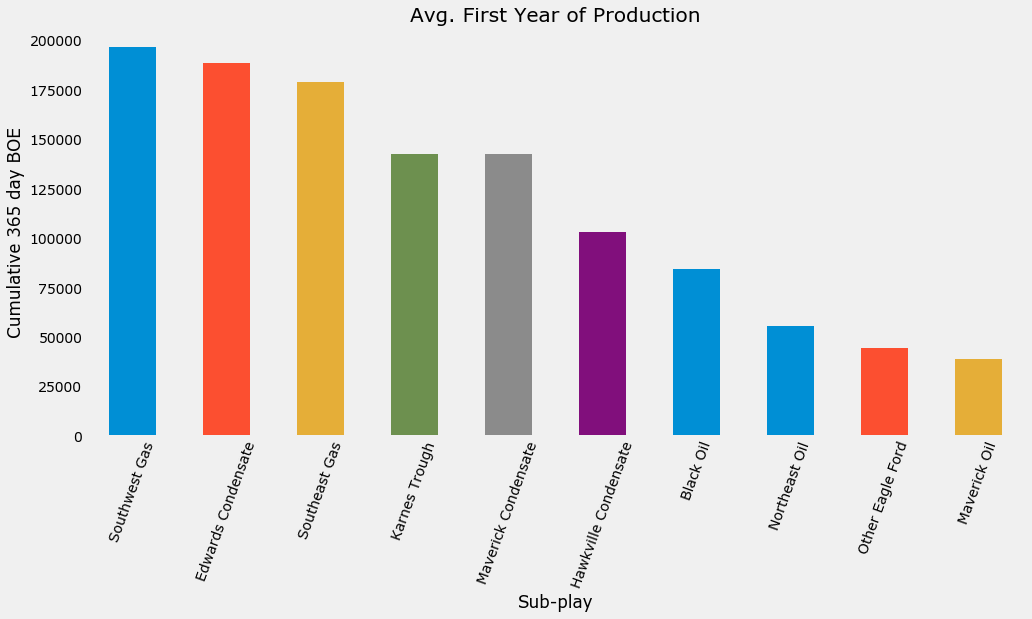

In [28]:
#ONE YEAR BOE
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    prod_avg.sort_values('Cum365 Total (boe)', ascending = False, inplace = True)
    prod_avg['Cum365 Total (boe)'].plot(kind='bar',figsize=(15, 7), rot=70)

    # Add axis labels and title
    plt.title("Avg. First Year of Production")
    plt.ylabel("Cumulative 365 day BOE")
    plt.grid(False)
    # Show plot
    plt.show()

### Investors like areas with a higher rate of return. Sw Gas, Se Gas, Maverick Condensate, Edwars Condensate, and Karnes Trough also produce more in the first year.

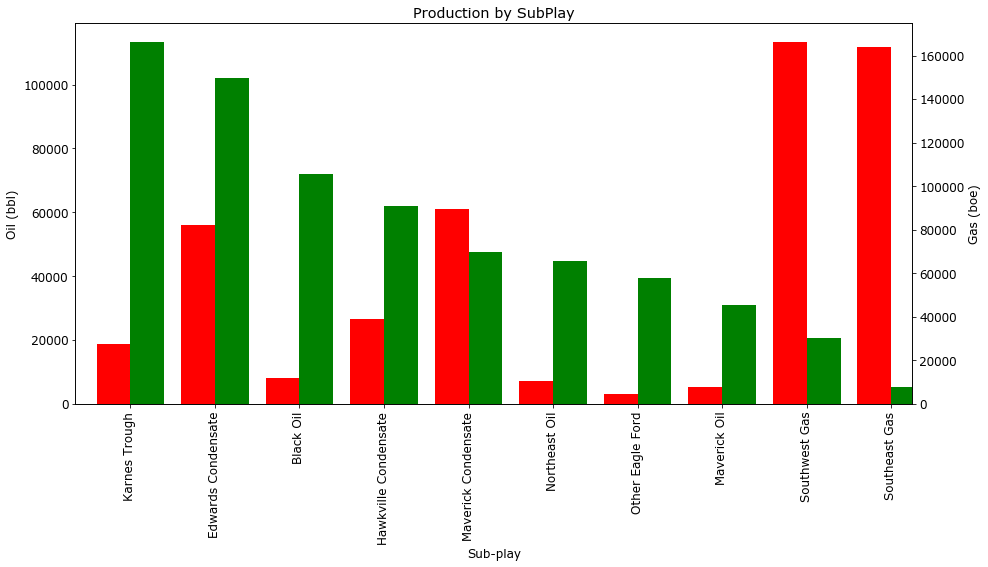

In [29]:
# Plot categorical costs 

prod_avg.sort_values('Cum365 Oil (bbl)', ascending = False, inplace = True)
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width = 0.4
prod_avg.loc[:,'Cum365 Oil (bbl)'].plot(kind='bar', color='green',figsize=(15, 7), ax=ax, width=width, position=0)
(prod_avg.loc[:,'Cum365 Gas (mcf)']/6).plot(kind='bar', color='red',figsize=(15, 7), ax=ax2, width=width, position=1)
    
# Add axis labels and title
plt.title("Production by SubPlay")
ax.set_ylabel("Oil (bbl)")
ax2.set_ylabel("Gas (boe)")
plt.grid(False)
# Show plot
plt.show()

### Karnes Trough and Edwards Condensate are more oil rich than the other higher, quicker producing regions. 
###It would be nice to have a better way to show the amount of gas contributing to BOE.

# With the Karnes Trough and Edwards Condensate in mind, let's compare the costs of all sub-plays.

# COSTS

In [30]:
# Build cost data frame
cost_df = pd.DataFrame({
                       'Sub-play':eagleford_df['Sub-play'],
                       'County':eagleford_df['County'],
                       'Well Cost Total (US$)':eagleford_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':eagleford_df['Rig Cost (US$)'],
                       'Water Cost (US$)':eagleford_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':eagleford_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':eagleford_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':eagleford_df['Other Cost (US$)'],
                       'DrillingCost' :eagleford_df['Other Cost (US$)'] + eagleford_df['Rig Cost (US$)'],
                       'CompletionCost' :eagleford_df['Proppant Cost (US$)'] + eagleford_df['Water Cost (US$)'] + eagleford_df['Pumping Cost (US$)'], 
                       'MD_Ft' :eagleford_df['Measured Depth (m)']* 3.28084,
                       'LL_Ft' :eagleford_df['Lateral Length (m)']* 3.28084,
                       'EUR Total (mboe)':eagleford_df['EUR Total (mmboe)']*1000 
                       })

In [31]:
# Drop rows with missing cost data
cost_df = cost_df.dropna(axis=0,how='any')

In [32]:
#drilling cost per ft
cost_df['DrillCostPerFt'] = cost_df['DrillingCost']/cost_df['MD_Ft']
#completions cost per ft
cost_df['CompCostPerFt'] = cost_df['DrillingCost']/cost_df['LL_Ft'] 
#costs per 1000 boe
cost_df['TotalCostPerEurMboe'] = cost_df['Well Cost Total (US$)']/cost_df['EUR Total (mboe)']

In [33]:
# Calculate average costs
cost_avg = cost_df.groupby('Sub-play').mean()
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),DrillingCost,CompletionCost,MD_Ft,LL_Ft,EUR Total (mboe),DrillCostPerFt,CompCostPerFt,TotalCostPerEurMboe
Sub-play,,,,,,,,,,,,,,
Black Oil,6.616557e+06,571394.653952,6.234985e+05,516538.853403,1.532268e+06,3.110147e+06,3.681542e+06,2.672305e+06,14845.859089,6121.939634,303.541082,255.039861,630.772035,inf
Edwards Condensate,7.352757e+06,787762.745528,4.507188e+05,615279.409273,1.913445e+06,3.230761e+06,4.018524e+06,2.979443e+06,18189.095977,5236.838818,528.737252,221.033658,789.633241,2.828922e+04
Hawkville Condensate,7.286108e+06,684179.590484,6.549881e+05,421915.812402,1.626546e+06,3.593319e+06,4.277499e+06,2.703450e+06,15861.918940,5910.674462,378.130655,272.816256,745.427756,4.921701e+04
Karnes Trough,7.205512e+06,649498.131925,5.707105e+05,536350.436893,1.613376e+06,3.522921e+06,4.172419e+06,2.720437e+06,16733.684115,5029.456003,437.968164,249.440630,853.175575,4.923383e+04
Maverick Condensate,6.653161e+06,679298.460690,6.130369e+05,534036.272069,1.161131e+06,3.388767e+06,4.068065e+06,2.308204e+06,13931.177483,5902.760636,616.123858,295.145433,711.034557,1.893539e+04
Maverick Oil,6.445103e+06,517461.491525,4.902044e+05,486218.279661,6.775817e+05,4.051222e+06,4.568683e+06,1.654004e+06,12133.516709,5773.677683,182.250000,381.520205,853.355089,6.775995e+04
Northeast Oil,7.574177e+06,734220.834437,1.004948e+06,874607.006623,2.047913e+06,2.650546e+06,3.384767e+06,3.927468e+06,15693.394389,6794.507695,220.790769,215.376225,511.599751,8.803508e+04
Other Eagle Ford,7.049492e+06,669419.900026,5.904695e+05,530821.902032,1.580403e+06,3.379521e+06,4.048941e+06,2.701695e+06,14447.126023,5988.591335,160.434783,299.116473,754.357502,1.776829e+05
Southeast Gas,7.884221e+06,972062.909091,3.325067e+05,206904.318182,1.533890e+06,4.417359e+06,5.389422e+06,2.073302e+06,18912.365726,5071.157934,623.720930,284.935887,1074.749049,2.225596e+04


# Total Cost by Sub-Play

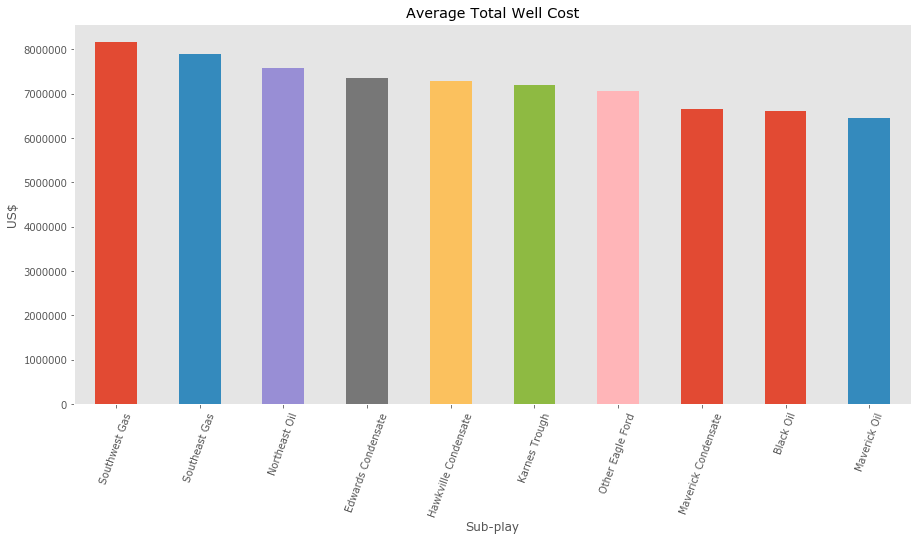

In [34]:
# Plot total cost averages
with plt.style.context('ggplot'):
    cost_avg.sort_values('Well Cost Total (US$)', ascending = False, inplace = True)
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Average Total Well Cost")
    plt.ylabel("US$")   
    plt.grid(False)
    # Show plot
    plt.show()

In [35]:
#Cumulative Avg cost of wells
well_cost_sum = 6962509
well_cost_sum

6962509

In [36]:
#Add 5 cost categories
sLength = 5
sLength

5

In [37]:
#Avg Cost by Category
preference = ({'Other Cost':3556165,
'Pumping':1559534,
'Rig':661654,
'Water':586413,
'Propant':598740
})

In [38]:
# sort preference in descending order
weights, labels = zip(*sorted(((pref,genre) for genre,pref in preference.items()), reverse=True))

for i in weights:
# cumu_1 = weights[0]
# cumu_2 = weights[1] + cumu_1
# cumu_3 = weights[2] + cumu_2
# cumu_4 = weights[3] + cumu_3
# cumu_5 = weights[4] + cumu_4
# cumu_6 = weights[5] + cumu_5
# cumu_7 = weights[6] + cumu_6
# cumu_8 = weights[7] + cumu_7
# cumu_9 = weights[8] + cumu_8
# cumu_10 = weights[9] + cumu_9
 cumu_1 = weights[0]/well_cost_sum
 cumu_2 = ((weights[1] + cumu_1)/well_cost_sum)+cumu_1
 cumu_3 = ((weights[2] + cumu_2)/well_cost_sum)+cumu_2
 cumu_4 = ((weights[3] + cumu_3)/well_cost_sum)+cumu_3
 cumu_5 = ((weights[4] + cumu_4)/well_cost_sum)+cumu_4
 #cumu_6 = ((weights[5] + cumu_5)/well_cost_sum)+cumu_5
 #cumu_7 = ((weights[6] + cumu_6)/well_cost_sum)+cumu_6
 #cumu_8 = ((weights[7] + cumu_7)/well_cost_sum)+cumu_7
 #cumu_9 = ((weights[8] + cumu_8)/well_cost_sum)+cumu_8
 #cumu_10 = ((weights[9] + cumu_9)/well_cost_sum)+cumu_9


cumu_weights = [cumu_1,cumu_2, cumu_3, cumu_4, cumu_5]

print(cumu_weights)

[0.5107591243329093, 0.7347494287991763, 0.8297805066404299, 0.9157754877284984, 0.9999999987166333]


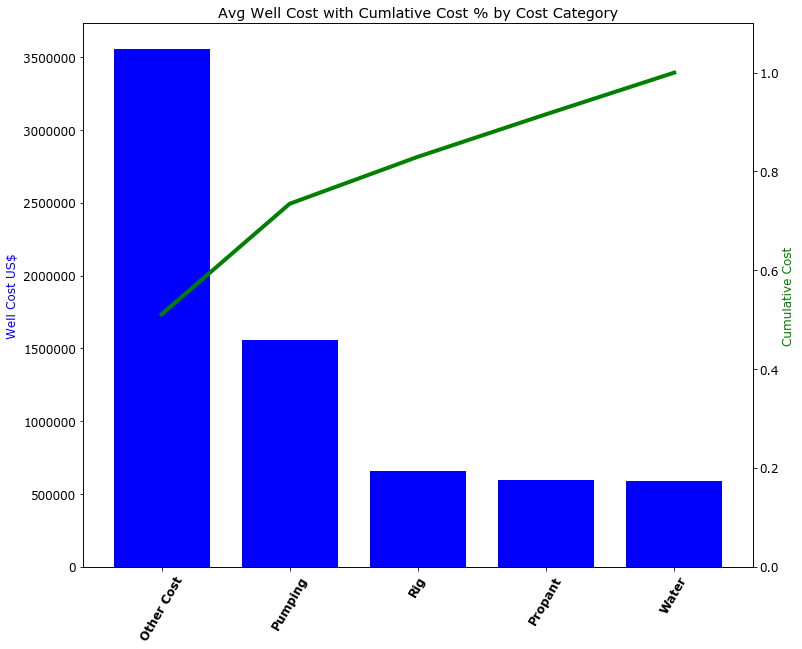

In [76]:
# lefthand edge of each bar

left = np.arange(len(weights))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(left, weights, 0.75,color='b',align="center")
plt.rcParams["figure.figsize"] = [12,10]

ax1.set_xticks(left)
ax1.set_xticklabels(labels,fontsize=12,fontweight='bold', rotation=60, color='black')

ax2.plot(cumu_weights, color ='green',linewidth=4)
plt.title("Average Well Cost Totals")
ax1.set_ylabel('Well Cost US$', color='b')
ax2.set_ylabel('Cumulative Cost', color='g')
ax2.set_ylim([0, 1.1])

plt.title("Avg Well Cost with Cumlative Cost % by Cost Category")
plt.grid(False)
 # Save Figure
plt.savefig("C:/Users/Sal/Desktop/pareto.png")


### The Karnes Trough and Edwrdas condensate generally average.  Sittign around 7.2M and 7.5M respectively.

# Drilling Costs Normalize to MD

In [ ]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('DrillCostPerFt', ascending = False, inplace = True)
    cost_avg['DrillCostPerFt'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Drilling cost by Measured depth (ft)")
    plt.ylabel("US$/ft")

     # Save Figure
    plt.savefig("Drilling Cost Per Foot.png")
    
    plt.show()

## The Maverick region overall looks to be the most expensive area.  Other Eagle Ford could be wildcats and other areas not benefitting from development mode cost reductions.  The Karnes adn Edwards are one of the cheapest places to drill.

# Completions Normalize to Lateral Length

In [ ]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('CompCostPerFt', ascending = False, inplace = True)
    cost_avg['CompCostPerFt'].plot(kind='bar',figsize=(15, 7),rot=70)

    # Add axis labels and title
    plt.title("Completion Costs by Lateral (ft)")
    plt.ylabel("US$/ft")

     # Save Figure
    plt.savefig("Completion Cost Per Foot.png")
    
    plt.show()

### Water, Proppant, and Pumping Cost are indicative of completion methods.  Historically, completions have increased with time. Our target Sub-Plays are a little above average, but not prohibitively high.  Average lateral lengths range from 4,500' to 11,500'.

## The Maverick Oil Sub-Play is the most expensive area on average. Steering clear of that area is advised.

# COST PER 1,000 BOE

In [ ]:
# Plot total cost per EUR mboe (i.e. per 1000 estimate barrels of oil equivalent recovered)
with plt.style.context('fivethirtyeight'):
    cost_avg.sort_values('TotalCostPerEurMboe', ascending = False, inplace = True)
    cost_avg['TotalCostPerEurMboe'].plot(kind='bar',figsize=(15, 7),rot=90)

    # Add axis labels and title
    plt.title("Cost per 1,000 boe (EUR)")
    plt.ylabel("US$")

    # Show plot
    plt.show()
#cost_avg #plot df to see mean values inf?

## The Edwards Condensate is nearly 25,000 (USD) per 1,000 barrels of oil equivalent.

In [ ]:
# Plot categorical costs 
with plt.style.context('ggplot'):
    cost_avg.sort_values('DrillingCost', ascending = False, inplace = True)
    cost_avg.loc[:,'DrillingCost':'CompletionCost'].plot(kind='bar',figsize=(20, 7),rot=70,width=.9)

    # Add axis labels and title
    plt.title("Average Drilling and Completions")
    plt.ylabel("US$")

    # Show plot
    plt.show()

## While the Edwards and Karnes have similar costs.  You dollar goes further in the Edwards.

In [ ]:
#ENTER STACKED BAR OR STACK THE COMPLAETIONS ABOVE
#https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

# DEPTHS

In [ ]:
# Build depth data frame
depth_df = pd.DataFrame({
                       'Sub-play':eagleford_df['Sub-play'],
                       'County':eagleford_df['County'],
                       'TVD_Ft':eagleford_df['Vertical Depth (m)']* 3.28084,
                       'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                       'EUR Total (mmboe)':eagleford_df['EUR Total (mmboe)'],
                       'Cum365 Gas (mcf)':eagleford_df['Cum365 Gas (mcf)'],
                       'Cum365 Oil (bbl)':eagleford_df['Cum365 Oil (bbl)'],
                       'LL_m' : eagleford_df['Lateral Length (m)'],
                       'MD_Ft' :eagleford_df['Measured Depth (m)']* 3.28084,
                       'LL_Ft' :eagleford_df['Lateral Length (m)']* 3.28084
                       })

# SUB-PLAY OPERATOR ACTIVITY

### Calc Average MD to estimate cost drilling cost (Avg. MD * Avg. Cost/ft)

In [ ]:
depth_df.groupby('Sub-play')['MD_Ft'].describe()

### Calc Average Lateral Length to estimate completions from average water, proppant, pumping.

In [ ]:
depth_df.groupby('Sub-play')['LL_Ft'].describe()

###### The mean lateral length is the average horizontal distance each operator's drilled. Possibly indicative of formation homogeneity.

In [ ]:
depth_df.groupby('Sub-play')['TVD_Ft'].describe()

###### The mean vertical depth is the average depth of operator's target geological formation.  Indicative of sub-plays with deepest exploitable zones.

# MAP OF HIGHER PRODUCING AREA

In [ ]:
#import cleaned csv
eagleford_df = pd.read_csv(file)

In [ ]:
#differentiate between commodity
oil = eagleford_df[(eagleford_df['Well Type'] != 'Gas')]
gas = eagleford_df[(eagleford_df['Well Type'] == 'Gas')]

In [ ]:
#Grab lat/longs for mapping
#lat/Longs for extent
lats = list(eagleford_df['Latitude'])
lons = list(eagleford_df['Longitude'])
boeSz = list(eagleford_df['EUR Total (mmboe)'])
#Lat/longs for oil
olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
#Lat/longs for gas
glats = list(gas['Latitude'])
glons = list(gas['Longitude'])

In [ ]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 0.5

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells by Commodity Type")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.etopo()
#m.shadedrelief()

min_marker_size = 2

for i in range(len(glons)):
#for i in range(100):
    x,y = m(float(glons[i]), float(glats[i]))
    msize = boeSz[i]*min_marker_size
    m.plot(x, y, marker = 'o', c='red', markersize=msize, alpha=0.5, latlon=False)

for i in range(len(olons)):
#for i in range(100):
    x,y = m(float(olons[i]), float(olats[i]))
    msize = boeSz[i]*min_marker_size
    m.plot(x, y, marker = 'o', c='green', markersize=msize, alpha=0.5, latlon=False)
 

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', dpi=96, transparent=True)
plt.show()

# We chose to target the Karnes Trough and Edwards Condensate sub-plays.  We anticipate our overall individual well costs to have a minimum of ________ and a maximum of ________.  Our drilling cost min and max are respectively _______ and ________. Completions ________ and ________.  Our area is significantly derisked not only by the activity in the area, but also our ML model variables contributing to a successful payout.